# Test energy and lifetime fits

### Author: JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import time
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Sun Sep  2 12:41:09 2018


In [2]:
import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')



2018-09-02 12:41:37,040 | INFO : Hello world!


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

### Imports from IC

In [186]:
from   invisible_cities.evm  .ic_containers  import Measurement

In [6]:
from krcal.core.histo_functions      import h1
from krcal.core.histo_functions      import h1d
from krcal.core.histo_functions      import plot_histo
from krcal.core.histo_functions      import labels

In [7]:
from krcal.core.fit_energy_functions import gaussian_parameters
from krcal.core.fit_energy_functions import fit_energy
from krcal.core.fit_energy_functions import plot_fit_energy
from krcal.core.fit_energy_functions import plot_fit_energy_chi2
from krcal.core.fit_energy_functions import print_fit_energy
from krcal.core.fit_energy_functions import fit_gaussian_experiments
from krcal.core.fit_energy_functions import fit_gaussian_experiments_variable_mean_and_std
from krcal.core.fit_energy_functions import gaussian_params_from_fcs

In [8]:
from krcal.core.stat_functions       import gaussian_experiment
from krcal.core.stat_functions       import gaussian_experiments
from krcal.core.stat_functions       import gaussian_experiments_variable_mean_and_std
from krcal.core.stat_functions       import energy_lt
from krcal.core.stat_functions       import smear_e
from krcal.core.stat_functions       import energy_lt_experiment
from krcal.core.stat_functions       import energy_lt_experiments
from krcal.core.stat_functions       import energy_lt_experiment_double_exp

In [9]:
from krcal.core.fit_energy_histograms       import gaussian_histo_example
from krcal.core.fit_energy_histograms       import histo_gaussian_experiment_sample
from krcal.core.fit_energy_histograms       import histo_gaussian_params_and_pulls

In [10]:
from krcal.core.fit_lt_histograms       import histo_lt_params_and_pulls

In [12]:
from krcal.core.fit_lt_functions     import fit_lifetime
from krcal.core.fit_lt_functions     import fit_lifetime_experiments
from krcal.core.fit_lt_functions     import lt_params_from_fcs
from krcal.core.fit_lt_functions     import plot_fit_lifetime
from krcal.core.fit_lt_functions     import print_fit_lifetime
from krcal.core.fit_lt_functions     import plot_fit_lifetime_chi2

In [13]:
from krcal.core.analysis_functions   import selection_in_band
from krcal.core.analysis_functions   import plot_selection_in_band

In [14]:
from krcal.core.plt_functions        import plot_energy_vs_z_histo_and_profile

In [15]:
from krcal.core.kr_types import PlotLabels
from krcal.core.kr_types import FitType
from krcal.core          import fit_functions_ic as fitf

## Gaussian fits

### First example:
- Generate guassian data
- histogram
- fit a gaussian
- plot fit
- print fit

#### Generate gaussian data

In [16]:
Nevt  = 1e6
mean = 100
sigma = 10
e = gaussian_experiment(nevt=Nevt, mean=mean, std=sigma)

#### Compute a gaussian seed. 

- Notice that mean and sigma of gaussian seed are close to true values, with small errors

In [17]:
seed = gaussian_parameters(e, (0,200), 1)
print(seed)

GaussPar(mu=Measurement(value=100.00968647356703, uncertainty=0.009992682558285374), std=Measurement(value=9.992682558285374, uncertainty=0.0070658971321575755), amp=Measurement(value=39923.44178597489, uncertainty=0.017711577537100277))


#### Histogramming the gaussian distribution

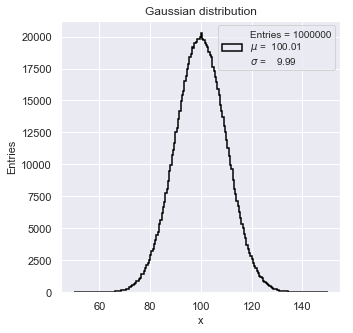

In [19]:
r = mean - 5 * sigma, mean + 5 * sigma
(_) = h1d(e, bins=200, range = r, pltLabels=PlotLabels(x='x', y='Entries', title='Gaussian distribution'),  figsize=(5,5))

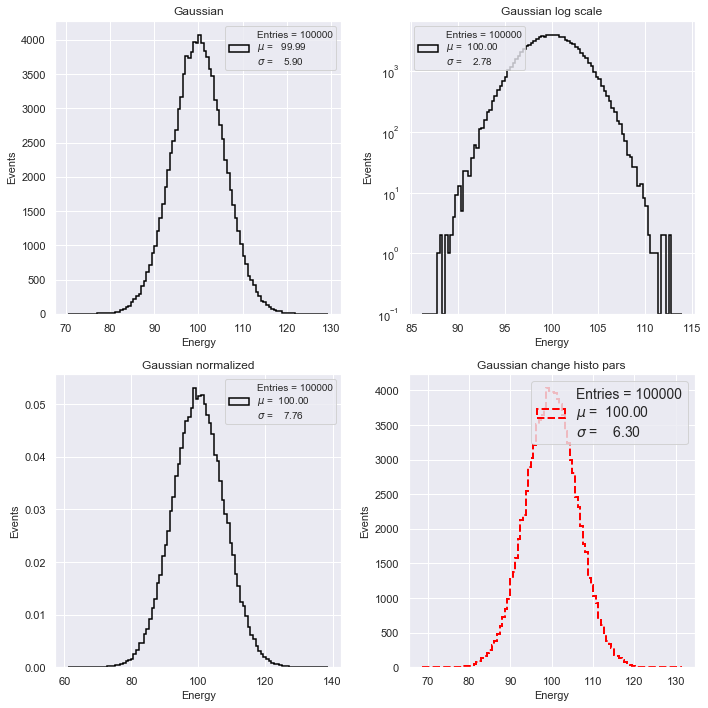

In [20]:
gaussian_histo_example(mean = 100, nevt=1e+5)

#### Fitting a gaussian to the distribution

In [21]:
fc = fit_energy(e, nbins=100, range=(0,200), n_sigma =3)

  Fit was valid = True
 Emu       = 100.01357366269393 +-0.010159843446147081 
 E sigma   = 10.010335593616318 +-0.007615761701780816 
 chi2    = 0.8520065197939016 
 sigma E/E (FWHM)     (%) =23.52109597076936
 sigma E/E (FWHM) Qbb (%) =3.037795559981619 


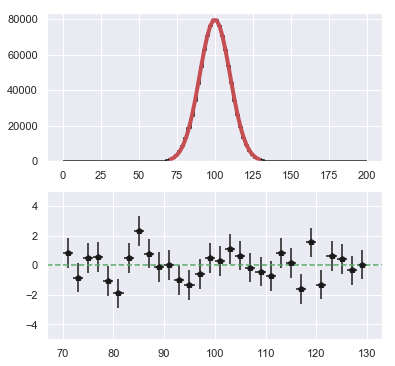

In [22]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2, 1, 1)
plot_fit_energy(fc)
ax = fig.add_subplot(2, 1, 2)
plot_fit_energy_chi2(fc)
print_fit_energy(fc)

### run many gaussian experiments and show the pull

In [23]:
mean = 1e+4
std  = 0.02
sigma = mean * std
exps = gaussian_experiments(mexperiments = 1000, nsample =1000, mean=mean, std = sigma)

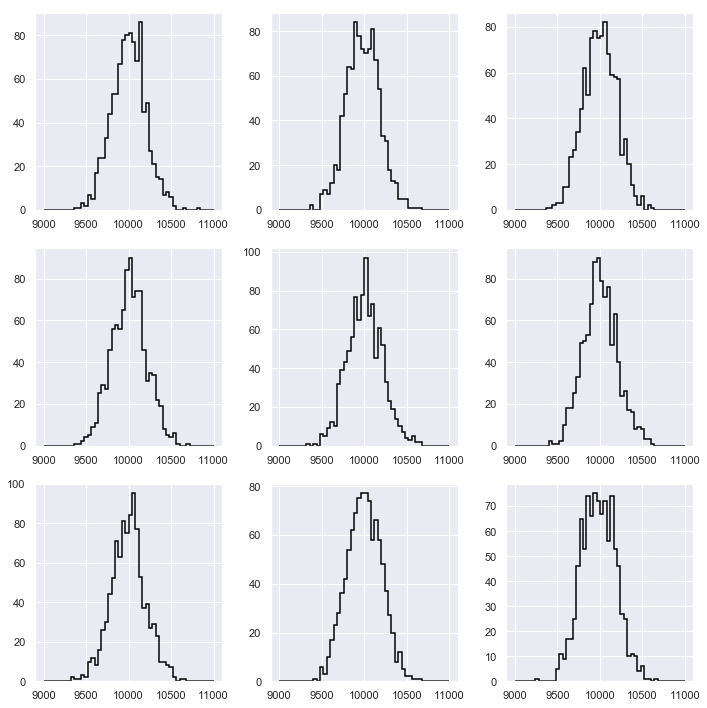

In [24]:
histo_gaussian_experiment_sample(exps, mexperiments = 1000, bins = 50, range_e = (9e+3,11e+3), samples=9, canvas=(3,3), figsize=(10,10))

In [25]:
fcs = fit_gaussian_experiments(exps, nbins = 50, range =(9e+3, 11e+3), n_sigma =3)

 fit failed for seed  = GaussPar(mu=Measurement(value=10005.768889448118, uncertainty=6.228031995553197), std=Measurement(value=196.94766446351764, uncertainty=4.406087252164992), amp=Measurement(value=81.02503403391866, uncertainty=11.044422886767979)), due to RunTimeWarning, retry fit 
 fit failed for seed  = GaussPar(mu=Measurement(value=9994.575953925732, uncertainty=6.121407834196957), std=Measurement(value=193.5759124286074, uncertainty=4.330654859001319), amp=Measurement(value=82.43634766253602, uncertainty=10.855341917240834)), due to RunTimeWarning, retry fit 


In [26]:
mus, umus, stds, ustds, chi2s = gaussian_params_from_fcs(fcs)

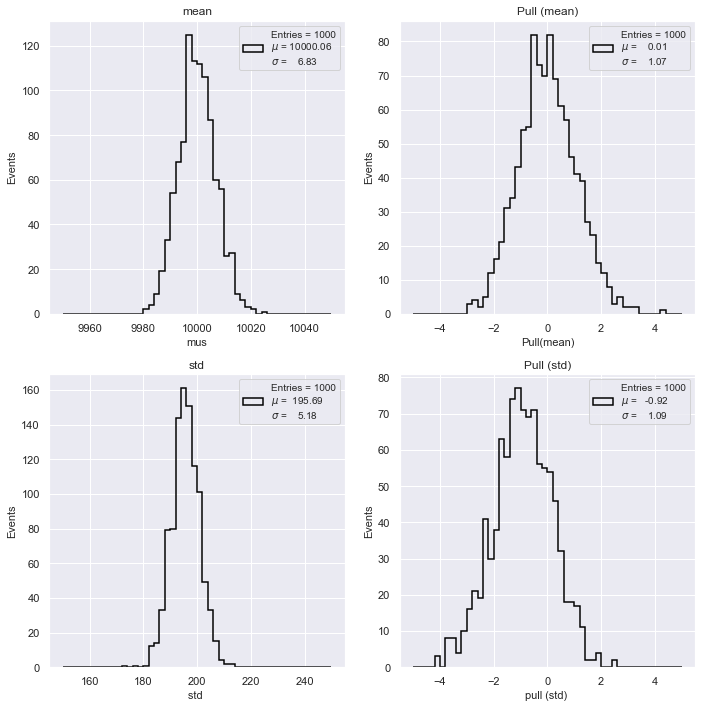

In [27]:
histo_gaussian_params_and_pulls(mean, sigma, mus, umus, stds, ustds, figsize=(10,10))

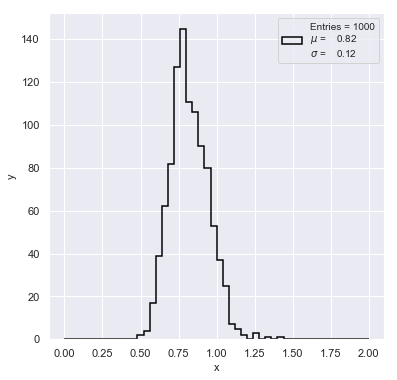

In [29]:
(_) = h1d(chi2s, bins = 50, range =(0,2))

### Show that the difference between the gaussian parameters estimated with a fit and the statistical estimator (mean, std) is gaussian

In [30]:
means, stds, exps = gaussian_experiments_variable_mean_and_std(mexperiments = 1000,
                                                  nsample      = 100,
                                                  mean_range   = (100, 1000),
                                                  std_range    = (1, 50))

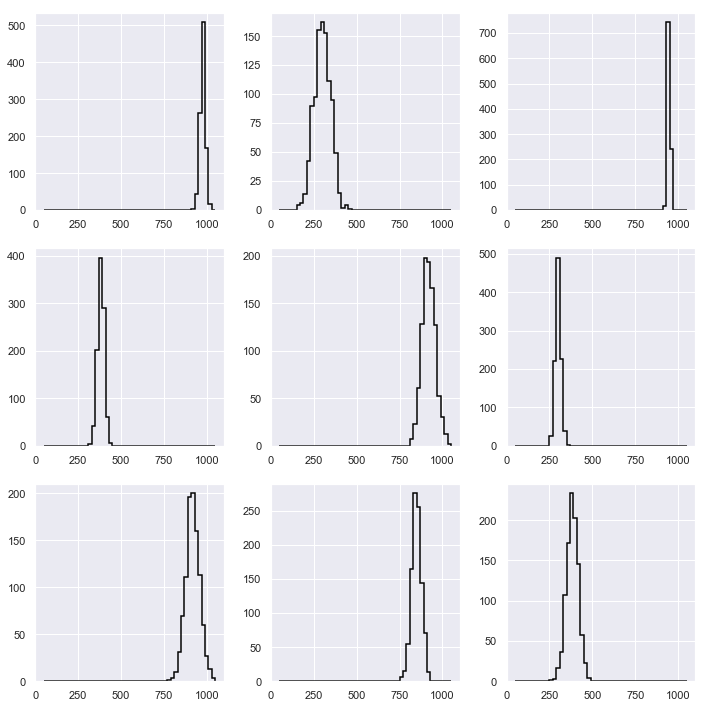

In [31]:
histo_gaussian_experiment_sample(exps, mexperiments = 1000, bins = 50, range_e = (50,1050), samples=9, canvas=(3,3), figsize=(10,10))

In [32]:
SEED, MU, STD, AVG, RMS, CHI2 = fit_gaussian_experiments_variable_mean_and_std(means, stds, exps, bins = 50, n_sigma=3)

In [33]:
mean  = np.array([x.value for x in SEED])
sigma = np.array([x.uncertainty for x in SEED])

In [34]:
avg = np.array([x.value for x in AVG])
avg_u = np.array([x.uncertainty for x in AVG])
rms = np.array([x.value for x in RMS])
rms_u = np.array([x.uncertainty for x in RMS])

In [35]:
mu = np.array([x.value for x in MU])
mu_u = np.array([x.uncertainty for x in MU])
std = np.array([x.value for x in STD])
std_u = np.array([x.uncertainty for x in STD])

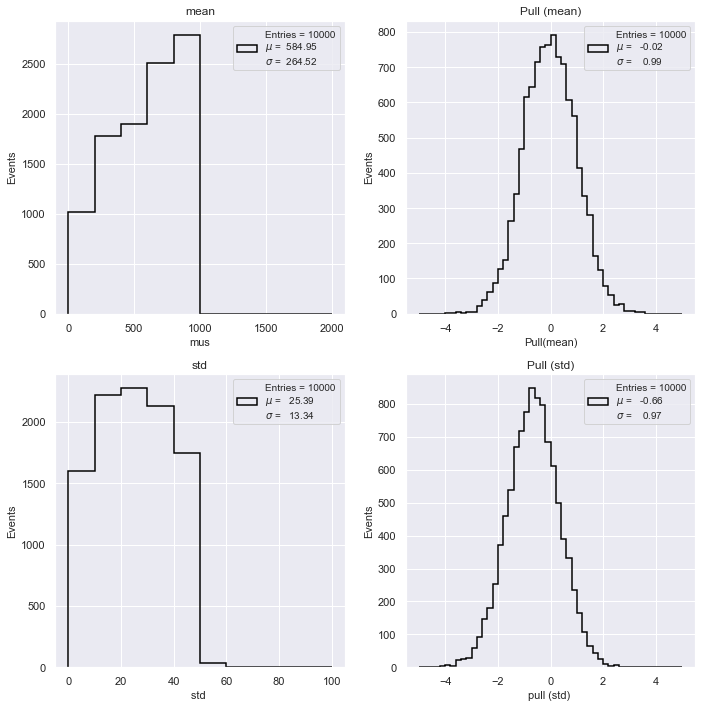

In [36]:
histo_gaussian_params_and_pulls(mean, sigma, avg, avg_u, rms, rms_u,
                                bin_mus    = 10,
                                bin_stds   = 10,
                                bin_pull   = 50,
                                range_mus  = (0, 2000),
                                range_stds = (0, 100),
                                range_pull = (-5,5),
                                figsize=(10,10))

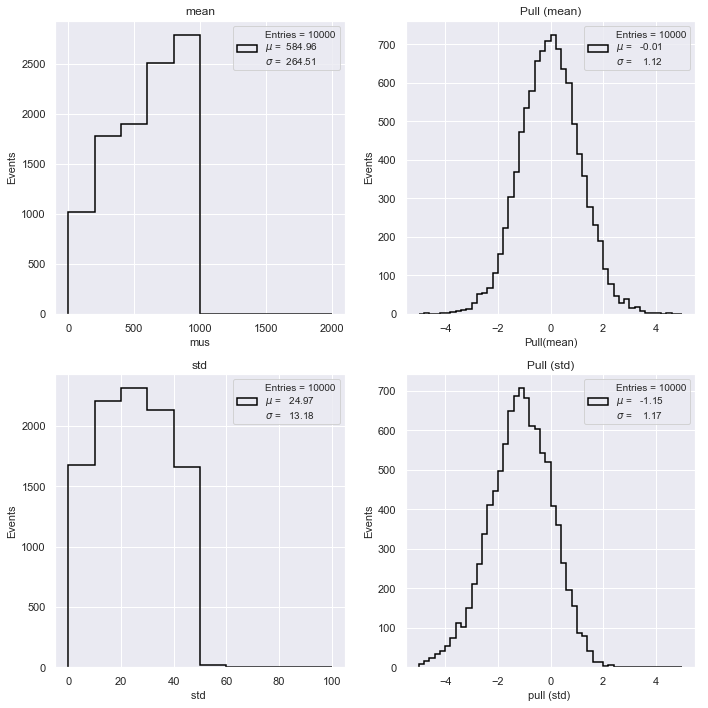

In [37]:
histo_gaussian_params_and_pulls(mean, sigma, mu, mu_u, std, std_u,
                                bin_mus    = 10,
                                bin_stds   = 10,
                                bin_pull   = 50,
                                range_mus  = (0, 2000),
                                range_stds = (0, 100),
                                range_pull = (-5,5),
                                figsize=(10,10))

#### The avg and rms of the gaussian distributions are slighly better behaved that those of the fits

- Pull is better for the avg and the rms than for the mu and std
- mu is unbiased in both cases but rms less umbiased than std

## Exponential fits

In [38]:
Nevt  = int(1e5)
e0 = 1e+4 # pes
std = 0.02 * e0
lt = 2000 # lifetime in mus
nbins_z = 12

### generate data

In [39]:
z, es = energy_lt_experiment(Nevt, e0, lt, std)                         

In [40]:
zc, emean_z, esigma_z     = fitf.profileX(z, es, nbins_z)

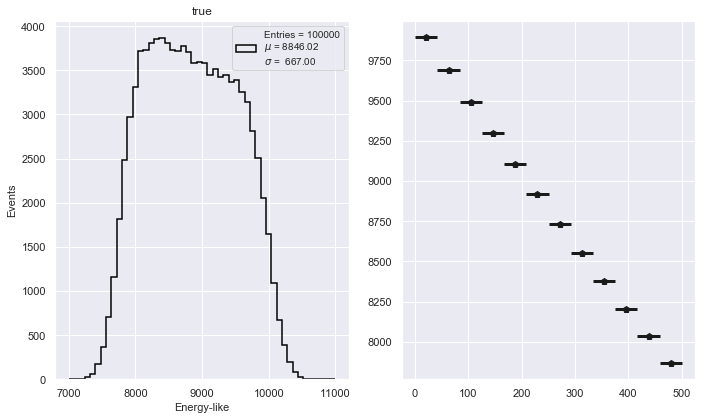

In [41]:
plot_energy_vs_z_histo_and_profile(es, zc, emean_z, esigma_z,
                                   bins_e = 50, range_e = (7e+3,11e+3),
                                   figsize=(10,6))

### Fit lifetime  data to binned and unbinned mode

In [42]:

ti = time.time()
fc = fit_lifetime(z, es, fit = FitType.profile, nbins_z=nbins_z, nbins_e=50, range_z=(0, 500), range_e=(7000, 11000))
tf = time.time()
print(f't = {tf -ti}')

t = 0.007899761199951172


In [44]:
ti = time.time()
fcu = fit_lifetime(z, es, fit = FitType.unbined, nbins_z=nbins_z, nbins_e=50, range_z=(0, 500), range_e=(7000, 11000))
tf = time.time()
print(f't = {tf -ti}')

t = 0.04166293144226074


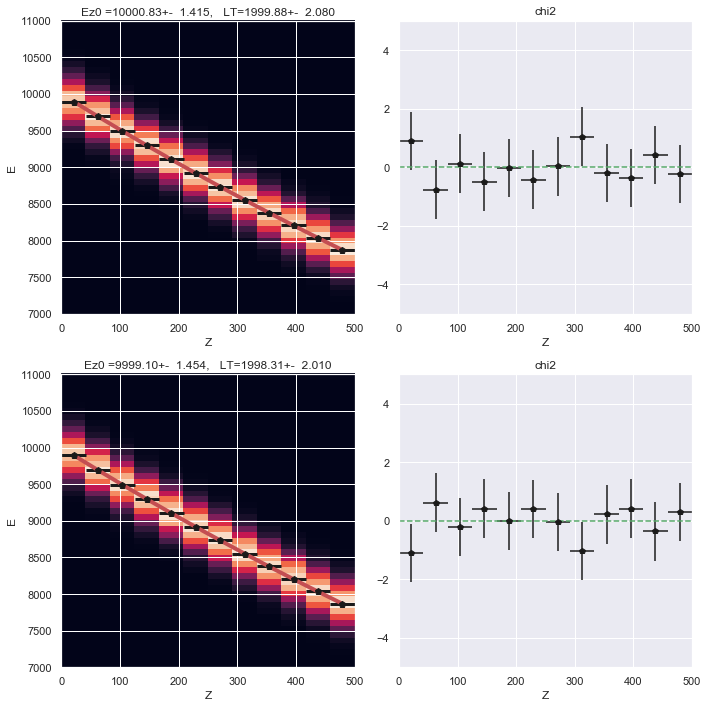

In [45]:
fig = plt.figure(figsize=(10,10))
ax      = fig.add_subplot(2, 2, 1)
plot_fit_lifetime(fc)

ax      = fig.add_subplot(2, 2, 2)
plot_fit_lifetime_chi2(fc)

ax      = fig.add_subplot(2, 2, 3)
plot_fit_lifetime(fcu)

ax      = fig.add_subplot(2, 2, 4)
plot_fit_lifetime_chi2(fcu)

plt.tight_layout()


In [46]:
print_fit_lifetime(fc)

 Ez0     = 10000.833374600421 +-1.414522316626088 
 LT      = 1999.8849574191127 +-2.080049526701651 
 chi2    = 0.33281420954462904 


In [47]:
print_fit_lifetime(fcu)

 Ez0     = 9999.103471988383 +-1.4538935842100007 
 LT      = 1998.3067559790538 +-2.009930947239932 
 chi2    = 0.5104252271406545 


### Run experiments

In [48]:
mexperiments = 1e+3
nsample      = 1e+3
zs, es = energy_lt_experiments(mexperiments, nsample, e0, lt, std)

In [54]:
fcp = fit_lifetime_experiments(zs, es, 
                               nbins_z=10, 
                               nbins_e =25,
                               range_z =(0,500),
                               range_e =(7000,11000),
                               fit=FitType.profile)

In [57]:
fcu  = fit_lifetime_experiments(zs, es, 
                                nbins_z=10, 
                                nbins_e =25,
                                range_z =(0,500),
                                range_e =(7000,11000),fit=FitType.unbined)
fcu2 = fit_lifetime_experiments(zs, es, 
                                nbins_z=10, 
                                nbins_e =25,
                                range_z =(0,500),
                                range_e =(7000,11000),fit=FitType.unbined)

In [58]:
e0s, ue0s, lts,ults, chi2p = lt_params_from_fcs(fcp)

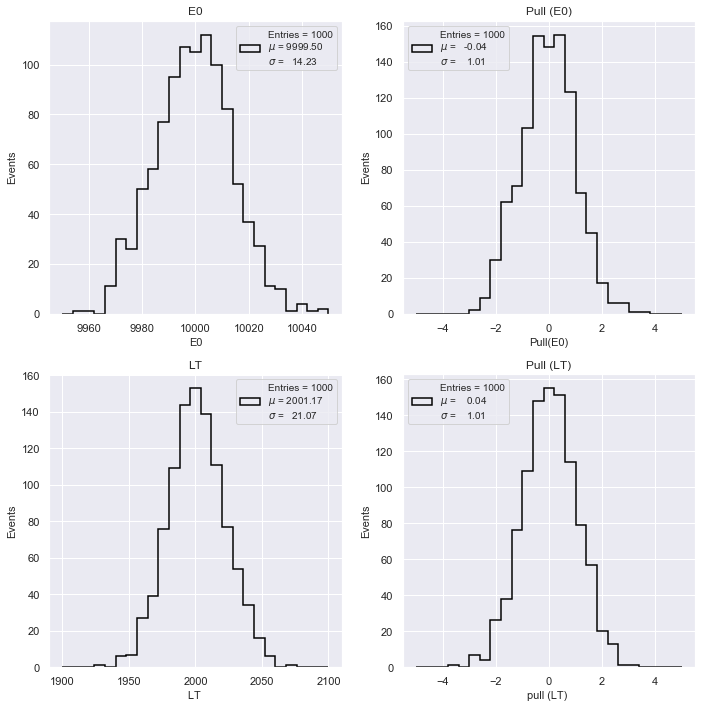

In [59]:
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, 
                          bin_e0s    = 25,
                          bin_lts    = 25,
                          bin_pull   = 25,
                          range_e0s  = (9950,10050),
                          range_lts  = (1900,2100),
                          range_pull = (-5,5),figsize=(10,10))

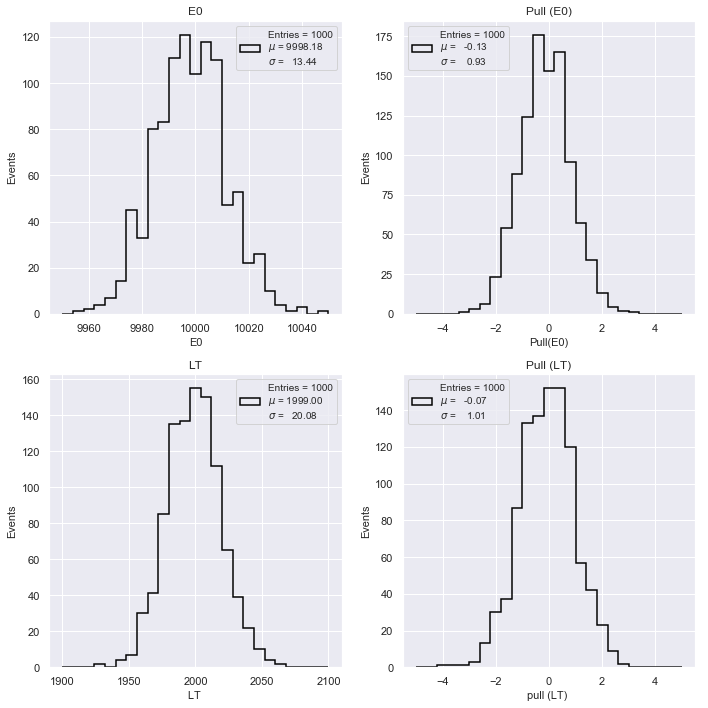

In [60]:
e0s, ue0s, lts,ults, chi2u = lt_params_from_fcs(fcu)
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, 
                          bin_e0s    = 25,
                          bin_lts    = 25,
                          bin_pull   = 25,
                          range_e0s  = (9950,10050),
                          range_lts  = (1900,2100),
                          range_pull = (-5,5),figsize=(10,10))

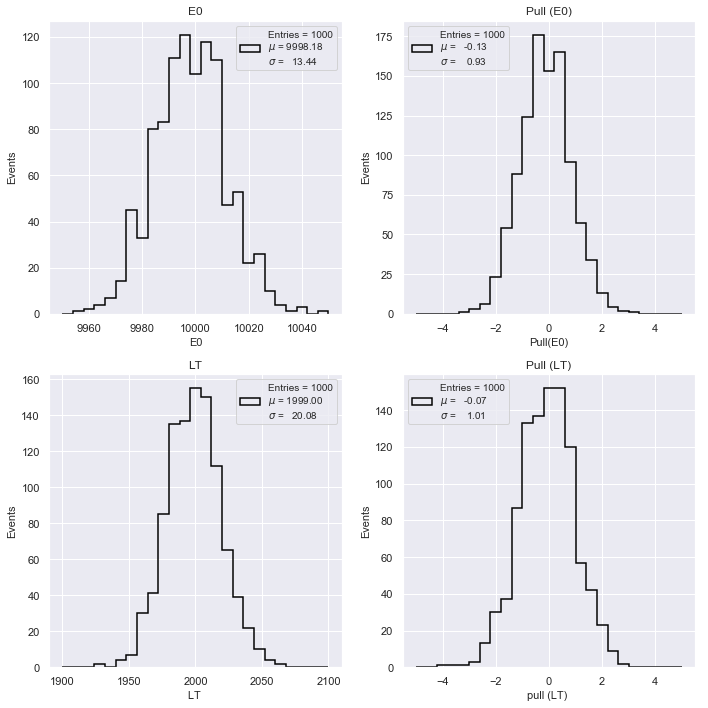

In [61]:
e0s, ue0s, lts,ults, chi2u2 = lt_params_from_fcs(fcu2)
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, 
                          bin_e0s    = 25,
                          bin_lts    = 25,
                          bin_pull   = 25,
                          range_e0s  = (9950,10050),
                          range_lts  = (1900,2100),
                          range_pull = (-5,5),figsize=(10,10))

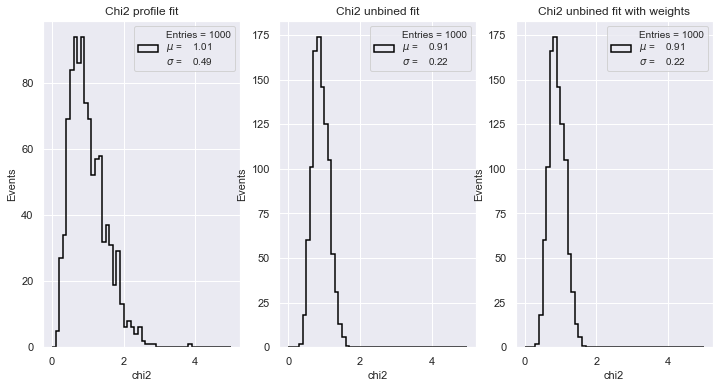

In [62]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 3, 1)
pltLabels =PlotLabels(x='chi2', y='Events', title='Chi2 profile fit')
(_) = h1(chi2p, bins=50, range=(0,5))
plot_histo(pltLabels, ax)

ax = fig.add_subplot(1, 3, 2)
pltLabels =PlotLabels(x='chi2', y='Events', title='Chi2 unbined fit')
(_) = h1(chi2u, bins=50, range=(0,5))
plot_histo(pltLabels, ax)

ax = fig.add_subplot(1, 3, 3)
pltLabels =PlotLabels(x='chi2', y='Events', title='Chi2 unbined fit with weights')
(_) = h1(chi2u2, bins=50, range=(0,5))
plot_histo(pltLabels, ax)






## Selection in band

In [63]:
Nevt  = int(1e6)
e0 = 12e+3 # pes
std = 0.02 * e0
lt = 2000 # lifetime in mus

e02 = 8e+3
std2 = 0.02 * e02
lt2 = 1500 # lifetime in mus
nbins_z = 50
range_z = (1,500)

nbins_e0 = 50
range_e0 = (1000,15000)

zbins  = np.linspace(*range_z, nbins_z + 1)
ebins  = np.linspace(*range_e0, nbins_e0 + 1)

In [64]:
z1, e1 = energy_lt_experiment(Nevt, e0, lt, std,   zmin=1, zmax =  500)
z2, e2 = energy_lt_experiment(Nevt, e02, lt2, std2, zmin=1, zmax =  500)

In [65]:
z  = np.concatenate((z1, z2))
es = np.concatenate((e1, e2))
zc, emean_z, esigma_z     = fitf.profileX(z, es, nbins_z)

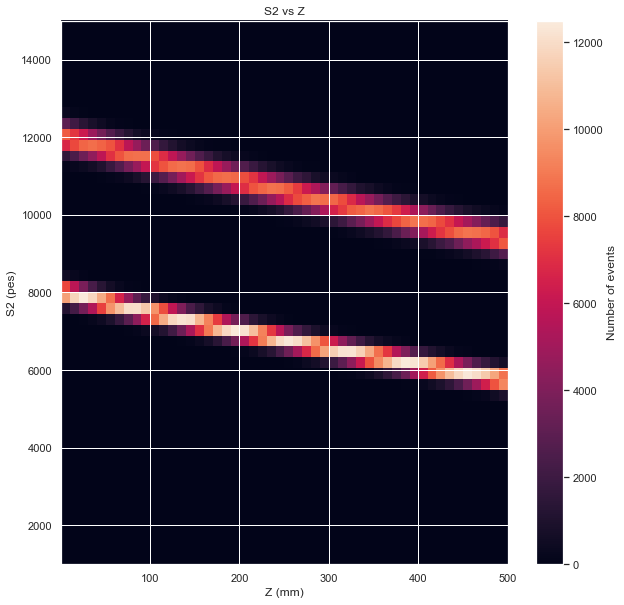

In [66]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1, 1, 1)
nevt, *_  = plt.hist2d(z, es, (zbins, ebins))    
plt.colorbar().set_label("Number of events")
labels(PlotLabels("Z (mm)", "S2 (pes)", f"S2 vs Z"))

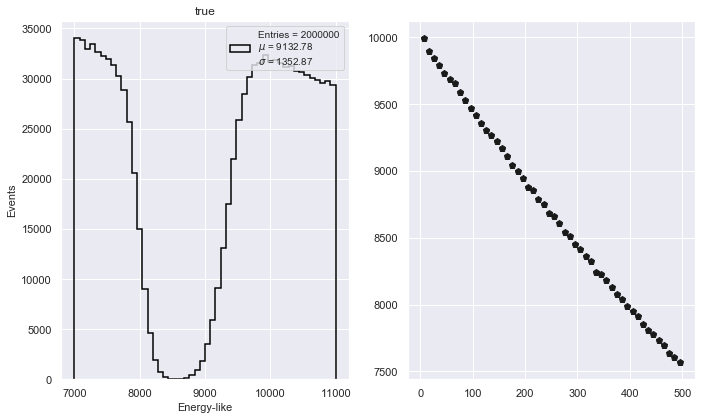

In [67]:
plot_energy_vs_z_histo_and_profile(es, zc, emean_z, esigma_z,
                                   bins_e = 50, range_e = (1e+3,13e+3),
                                   figsize=(10,6))

In [69]:
sel_inband, fpl, fph, hp, pp = selection_in_band(z, es,
                                                 range_z = (1, 500),
                                                 range_e = (9e+3,13e+3),
                                                 nbins_z = 25,
                                                 nbins_e = 50,
                                                 nsigma  = 3.5)

/Users/jjgomezcadenas/Projects/KrCalib/krcal/core/fit_functions.py:33: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)
/Users/jjgomezcadenas/Projects/KrCalib/krcal/core/fit_functions.py:33: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)


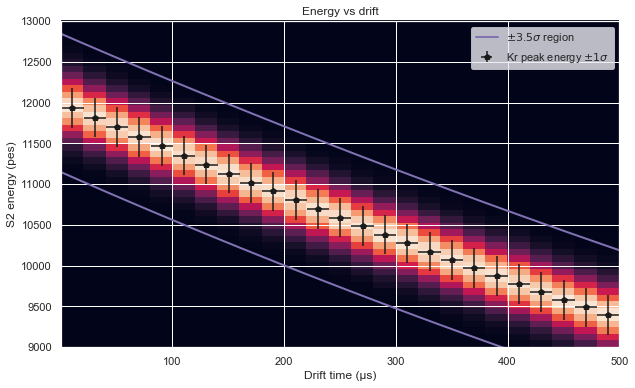

In [70]:
plot_selection_in_band(fpl, fph, hp, pp)

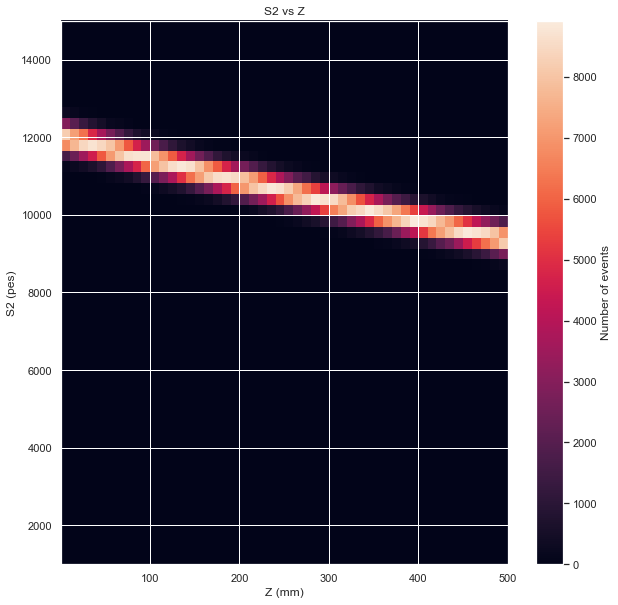

In [71]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1, 1, 1)
nevt, *_  = plt.hist2d(z[sel_inband], es[sel_inband], (zbins, ebins))    
plt.colorbar().set_label("Number of events")
labels(PlotLabels("Z (mm)", "S2 (pes)", f"S2 vs Z"))